In [2]:
library(ArchR);
set.seed(1);

setwd('/shen/shenlabstore3/neng/20200509_scATAC_sneddon/merged')
addArchRThreads(threads = 16) 
addArchRGenome("hg38")
outdir<-'/shen/shenlabstore3/neng/20200509_scATAC_sneddon/merged/revision1'
inputFiles<-c('/shen/shenlabstore3/neng/20200509_scATAC_sneddon/merged/fragments/Epcam-12wpc.fragments.tsv.gz',
    '/shen/shenlabstore3/neng/20200509_scATAC_sneddon/merged/fragments/Ep-Nu_2.fragments.tsv.gz',
    '/shen/shenlabstore3/neng/20200509_scATAC_sneddon/merged/fragments/Total-Nu_1.fragments.tsv.gz',
    '/shen/shenlabstore3/neng/20200509_scATAC_sneddon/merged/fragments/Total-Nu_2.fragments.tsv.gz')

names(inputFiles)<-c('Epcam-12wpc','Ep-Nu_2','Total-Nu_1','Total-Nu_2')
proj <- loadArchRProject(path = outdir)

Setting default number of Parallel threads to 16.

Setting default genome to Hg38.

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\_

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-1fd26113f474-Date-2020-09-04_Time-14-46-21.log
If there is an issue, please report to github with logFile!

2020-09-04 14:46:23 : Computing Total Accessibility Across All Features, 0.007 mins elapsed.

2020-09-04 14:46:28 : Computing Top Features, 0.092 mins elapsed.

###########
2020-09-04 14:46:28 : Running LSI (1 of 2) on Top Features, 0.101 mins elapsed.
###########

2020-09-04 14:46:29 : Sampling Cells (N = 10002) for Estimated LSI, 0.103 mins elapsed.

2020-09-04 14:46:29 : Creating Sampled Partial Matrix, 0.103 mins elapsed.

2020-09-04 14:46:46 : Computing Estimated LSI (projectAll = FALSE), 0.401 mins elapsed.

2020-09-04 14:48:38 : Identifying Clusters, 2.255 mins elapsed.

2020-09-04 14:49:41 : Identified 8 Clusters, 3.315 mins elapsed.

2020-09-04 14:49:41 : Saving LSI Iteration, 3.316 mins elapsed.

2020-09-04 14:50:00 : Creating Cluster Matrix on the total Group Features, 3.626 mins elapsed.

2020-09-0

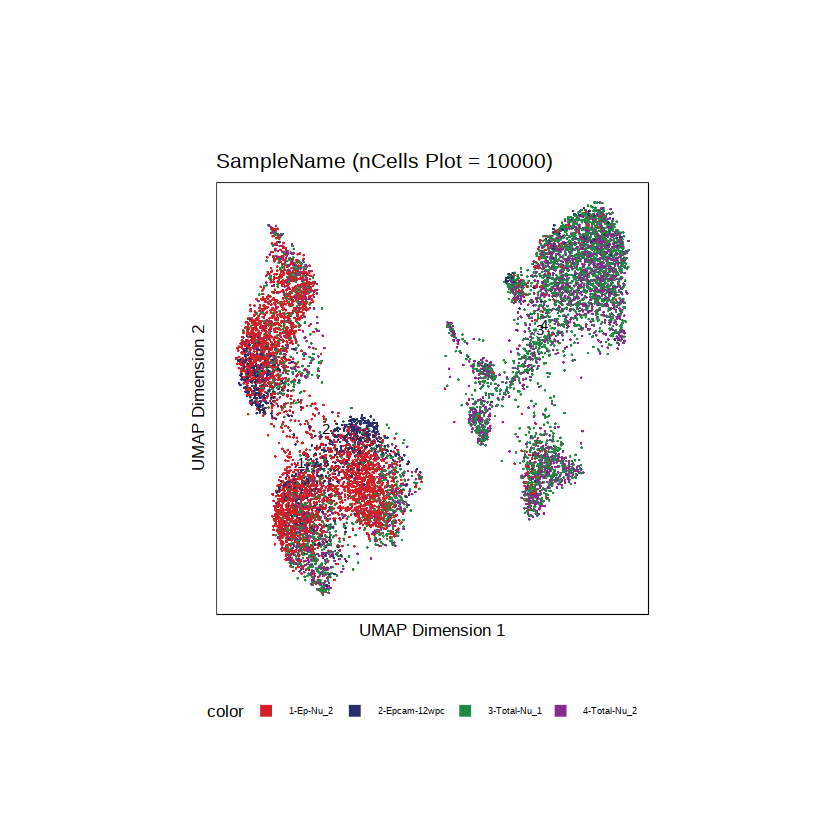

In [3]:
idxPass <- which(proj$TSSEnrichment >= 8 & proj$nFrags > 3000 & proj$nFrags <= 60000)
cellsPass <- proj$cellNames[idxPass]
proj.proc<-proj[cellsPass, ]
proj.proc <- addIterativeLSI(
    ArchRProj = proj.proc,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI-NotBatchCorrected", 
    iterations = 2, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = 0.8, 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:50,
    force=TRUE
)
proj.proc <- saveArchRProject(ArchRProj = proj.proc)

In [4]:
proj.proc <- addUMAP(ArchRProj = proj.proc, 
    reducedDims = "IterativeLSI-NotBatchCorrected", 
    minDist=0.5, metric="cosine",force=TRUE)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1fd224df043b-Date-2020-09-04_Time-15-04-22.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1fd224df043b-Date-2020-09-04_Time-15-04-22.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1fd240c5e6cb-Date-2020-09-04_Time-15-04-23.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1fd240c5e6cb-Date-2020-09-04_Time-15-04-23.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1fd21a4d324-Date-2020-09-04_Time-15-04-30.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchR

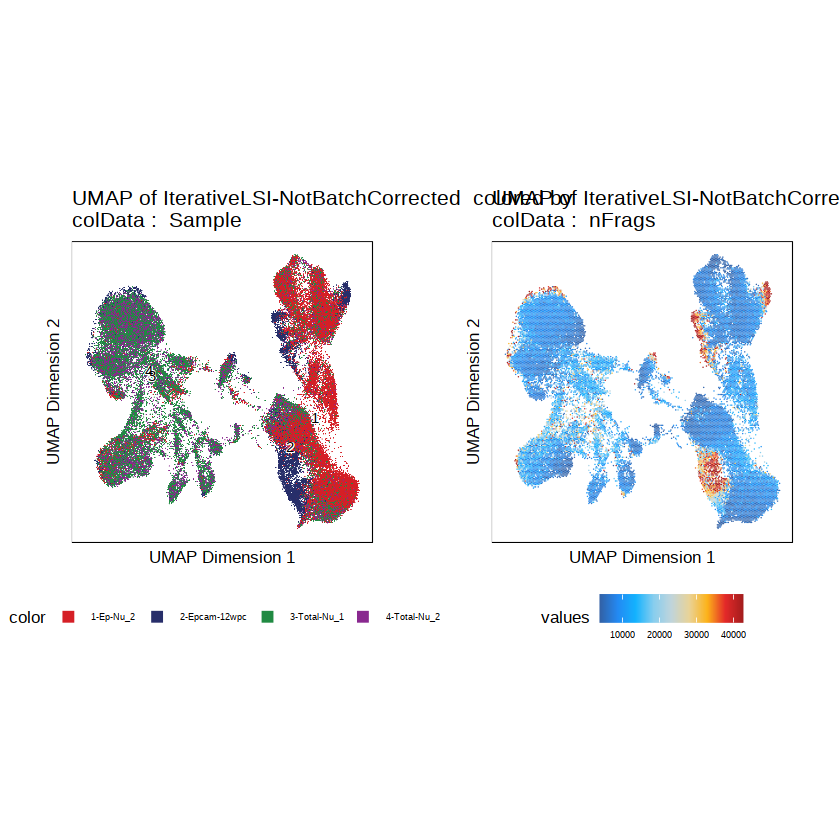

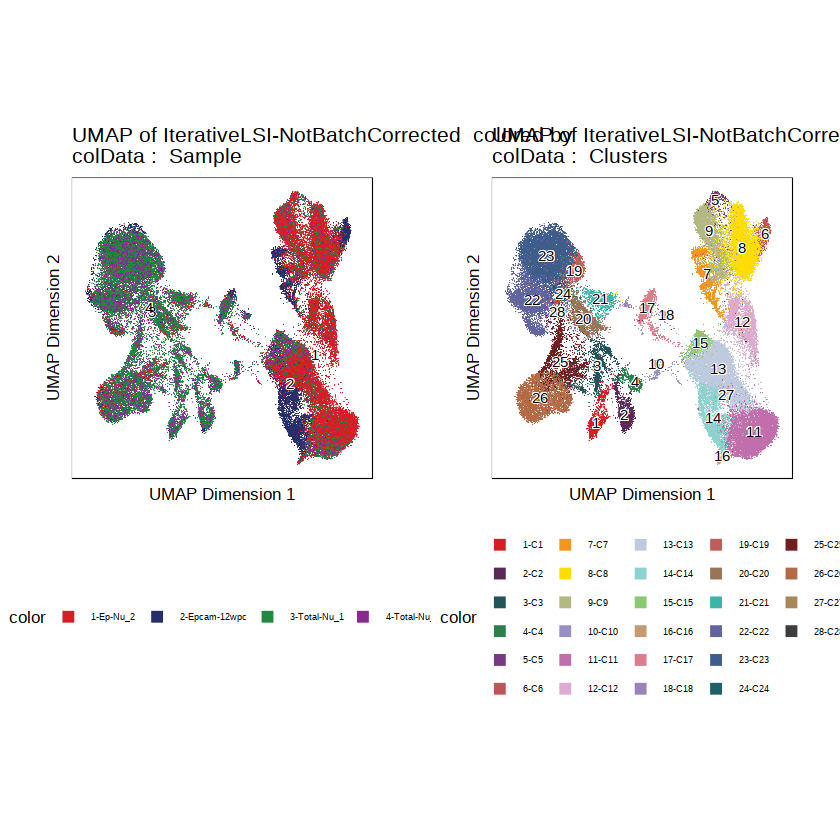

In [9]:
p1 <- plotEmbedding(ArchRProj = proj.proc, colorBy = "cellColData", name = "Sample", embedding = "UMAP", force=TRUE)
p2 <- plotEmbedding(ArchRProj = proj.proc, colorBy = "cellColData", name = "nFrags", embedding = "UMAP", force=TRUE)
ggAlignPlots(p1, p2, type = "h")

p3 <- plotEmbedding(ArchRProj = proj.proc, colorBy = "cellColData", name = "Clusters", embedding = "UMAP", force=TRUE)
ggAlignPlots(p1, p3, type = "h")

In [11]:
proj.proc


           ___      .______        ______  __    __  .______      
          /   \     |   _  \      /      ||  |  |  | |   _  \     
         /  ^  \    |  |_)  |    |  ,----'|  |__|  | |  |_)  |    
        /  /_\  \   |      /     |  |     |   __   | |      /     
       /  _____  \  |  |\  \\___ |  `----.|  |  |  | |  |\  \\___.
      /__/     \__\ | _| `._____| \______||__|  |__| | _| `._____|
    



class: ArchRProject 
outputDirectory: /shen/shenlabstore3/neng/20200509_scATAC_sneddon/merged/revision1 
samples(4): Ep-Nu_2 Total-Nu_1 Epcam-12wpc Total-Nu_2
sampleColData names(1): ArrowFiles
cellColData names(16): Sample TSSEnrichment ... BlacklistRatio Clusters
numberOfCells(1): 61341
medianTSS(1): 13.861
medianFrags(1): 8358

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

ArchR logging to : ArchRLogs/ArchR-addClusters-1fd265f9b9a0-Date-2020-09-04_Time-15-30-42.log
If there is an issue, please report to github with logFile!

2020-09-04 15:30:43 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.004 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 61341
Number of edges: 3637424

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9295
Number of communities: 28
Elapsed time: 21 seconds


2 singletons identified. 26 final clusters.

2020-09-04 15:36:17 : Testing Biased Clusters, 5.581 mins elapsed.

2020-09-04 15:36:18 : Testing Outlier Clusters, 5.586 mins elapsed.

2020-09-04 15:36:18 : Assigning Cluster Names to 26 Clusters, 5.586 mins elapsed.

2020-09-04 15:36:18 : Finished addClusters, 5.591 mins elapsed.

15:36:18 UMAP embedding parameters a = 0.583 b = 1.334

15:36:18 Read 61341 rows and found 50 numeric columns

15:36:18 Using Annoy for neighbor search, n_neighbors = 40

15:36:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

15:36:34 Writing NN index file to temp file /tmp/RtmpeEpWvX/file1fd210b0f6cd

15:36:34 Searching Annoy index using 16 threads, search_k = 4000

15:36:37 Annoy recall = 100%

15:36:40 Commencing smooth kNN distance calibr

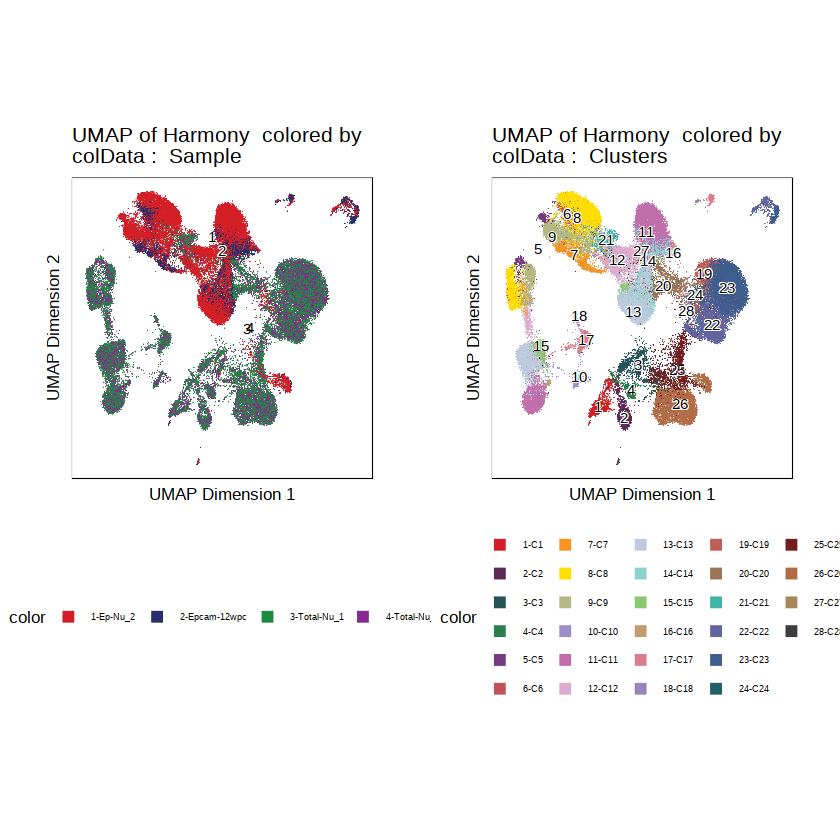

In [12]:
proj.proc <- addHarmony(
    ArchRProj = proj.proc,
    reducedDims = "IterativeLSI-NotBatchCorrected",
    dimsToUse=1:50,
    name = "Harmony",
    groupBy = "Sample",
    force = TRUE
)


proj.proc <- addClusters(
    input = proj.proc,
    reducedDims = "Harmony",
    method = "Seurat",
    name = "Clusters-Harmony",
    resolution = 0.7,
    force = TRUE
)
proj.proc <- addUMAP(ArchRProj = proj.proc, 
                reducedDims = "Harmony",
                minDist=0.5, 
                metric="cosine",
                force=TRUE)
p1 <- plotEmbedding(ArchRProj = proj.proc, colorBy = "cellColData", name = "Sample", embedding = "UMAP")
p2 <- plotEmbedding(ArchRProj = proj.proc, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")
ggAlignPlots(p1, p2, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ec95d50f1c9-Date-2020-09-03_Time-19-34-03.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ec95d50f1c9-Date-2020-09-03_Time-19-34-03.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ec9585ce404-Date-2020-09-03_Time-19-34-16.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ec9585ce404-Date-2020-09-03_Time-19-34-16.log



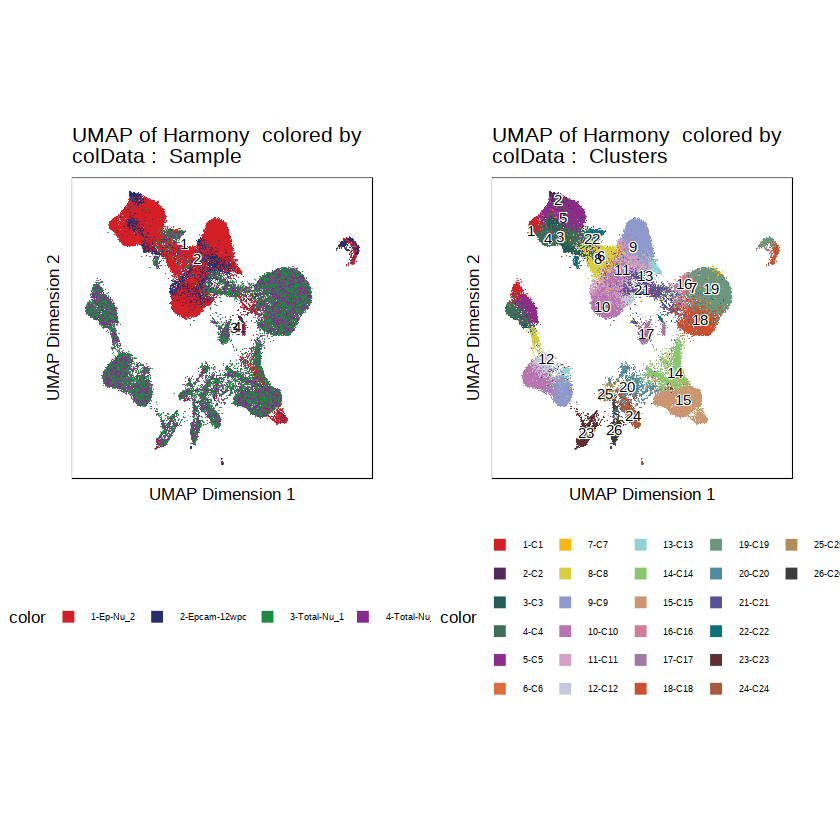

In [3]:
#saveArchRProject(ArchRProj = proj, outputDirectory = outdir, load = TRUE)
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Sample", embedding = "UMAP")
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "Clusters", embedding = "UMAP")
ggAlignPlots(p1, p2, type = "h")

In [4]:
colnames(proj$nFrags)

NULL

In [13]:
table(proj.proc$Sample)



    Ep-Nu_2 Epcam-12wpc  Total-Nu_1  Total-Nu_2 
      21842        5052       20525       13922 

In [21]:
x<-proj[cellsSample,]

In [ ]:
markerGenes <-  c('GAPDH','ACTB','INS','INS-IGF2','SCG5','NKX6-1',
  'PDX1','GCG', 'IRX2', 'IRX1', 'ARX',
  'MAFB', 'TTR','SST','PPY','GHRL',
  'NEUROG3','FEV','SUSD2','CPA1',
  'PTF1A', 'CPA2','REG1A','KRT19',
  'CFTR','SOX9','SPP1','VIM',
  'COL1A1','COL3A1','PTPRC','RAC2',
  'SOX10','WT1',
  'CAV1','PECAM1','EPCAM')

proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-5031d6cc747-Date-2020-09-03_Time-20-19-39.log
If there is an issue, please report to github with logFile!

2020-09-03 20:19:39 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



In [ ]:
p <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP",
    imputeWeights = getImputeWeights(proj)
)

plotPDF(plotList = p, 
    name = "Plot-UMAP-Marker-Genes-W-Imputation.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, width = 5, height = 5)


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-70c77ff83b69-Date-2020-09-03_Time-20-15-03.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-09-03 20:15:15 : 



Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 3731600)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

14:38:58 UMAP embedding parameters a = 0.7669 b = 1.223

14:38:58 Read 74632 rows and found 30 numeric columns

14:38:58 Using Annoy for neighbor search, n_neighbors = 40

14:38:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

14:39:16 Writing NN index file to temp file /tmp/Rtmp0dSQww/file1078529fc420

14:39:16 Searching Annoy index using 16 threads, search_k = 4000

14:39:20 Annoy recall = 100%

14:39:21 Commencing smooth kNN distance calibration using 16 threads

14:39:26 Initializing from normalized Laplacian + noise

14:39:38 Commencing optimization for 200 epochs, with 4970772 positive edges

14:42:06 Optimi

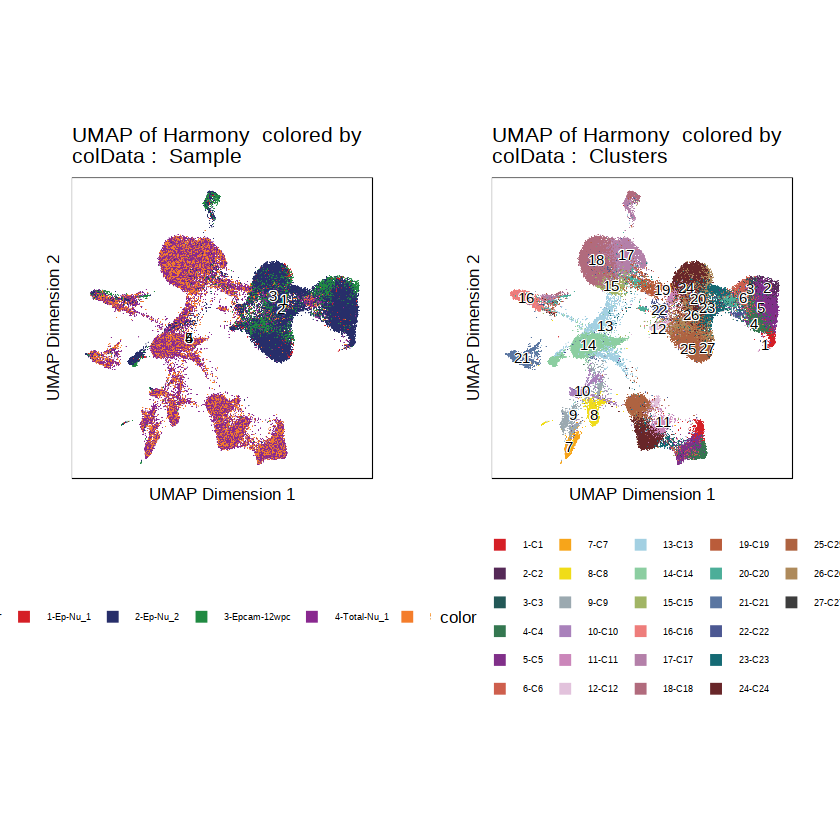

In [ ]:
proj

In [7]:
projHemeTmp <- filterDoublets(proj, filterRatio = 1.5)

ERROR: Error in filterDoublets(proj, filterRatio = 1.5): Already ran filterDoublets on ArchRProject! Cannot be re-ran on an ArchRProject!


In [ ]:
proj$